## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from matplotlib.dates import MonthLocator, DateFormatter
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## Preprocessing

### Download and read the dataset

In [3]:
df = pd.read_csv('/home/alireza/Desktop/owid-covid-data (2).csv')

### Explore the dataset, address missing values, and perform data cleaning to enhance data quality.

In [4]:
df.shape

(355465, 67)

In [5]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.isnull().sum()

iso_code                                           0
continent                                      16900
location                                           0
date                                               0
total_cases                                    38009
new_cases                                       9610
new_cases_smoothed                             10869
total_deaths                                   59728
new_deaths                                      9558
new_deaths_smoothed                            10788
total_cases_per_million                        38009
new_cases_per_million                           9610
new_cases_smoothed_per_million                 10869
total_deaths_per_million                       59728
new_deaths_per_million                          9558
new_deaths_smoothed_per_million                10788
reproduction_rate                             170648
icu_patients                                  317722
icu_patients_per_million                      

In [7]:
df["continent"].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

In [8]:
filterd_df = df[df["continent"].isna()]

filterd_df["location"].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'Low income', 'Lower middle income', 'North America', 'Oceania',
       'South America', 'Upper middle income', 'World'], dtype=object)

In [9]:
df['continent'].fillna(df['location'], inplace=True)

In [10]:
df.loc[df['continent'] == 'European Union', 'continent'] = 'Europe'

df.loc[df['continent'] == 'High income', 'continent'] = 'World'
df.loc[df['continent'] == 'Low income', 'continent'] = 'World'
df.loc[df['continent'] == 'Lower middle income', 'continent'] = 'World'
df.loc[df['continent'] == 'Upper middle income', 'continent'] = 'World'

In [11]:
df["continent"].unique()

array(['Asia', 'Africa', 'Europe', 'Oceania', 'North America',
       'South America', 'World'], dtype=object)

In [12]:
df['total_cases'].fillna(0, inplace=True)

In [13]:
df_filtered = df[(df['total_cases'] != 0) | (df.groupby('location')['total_cases'].transform('max') != 0)]

In [14]:
df_filtered.groupby('continent')['total_cases'].unique()

continent
Africa           [0.0, 1.0, 2.0, 3.0, 4.0, 9.0, 14.0, 26.0, 30....
Asia             [0.0, 1.0, 4.0, 7.0, 10.0, 16.0, 22.0, 24.0, 4...
Europe           [0.0, 2.0, 10.0, 15.0, 23.0, 33.0, 38.0, 42.0,...
North America    [0.0, 2.0, 3.0, 4.0, 6.0, 7.0, 9.0, 10.0, 11.0...
Oceania          [0.0, 1.0, 3.0, 4.0, 5.0, 10.0, 11.0, 18.0, 22...
South America    [0.0, 10.0, 14.0, 20.0, 22.0, 26.0, 34.0, 45.0...
World            [0.0, 2.0, 1.0, 3.0, 6.0, 7.0, 9.0, 18.0, 31.0...
Name: total_cases, dtype: object

In [15]:
df['new_cases'].fillna(0, inplace=True)
df['total_deaths'].fillna(0, inplace=True)
df['new_deaths'].fillna(0, inplace=True)
df['total_cases_per_million'].fillna(0, inplace=True)
df['new_cases_per_million'].fillna(0, inplace=True)
df['total_deaths_per_million'].fillna(0, inplace=True)
df['new_deaths_per_million'].fillna(0, inplace=True)

df['icu_patients_per_million'].fillna(0, inplace=True)
df['icu_patients'].fillna(0, inplace=True)
df['hosp_patients'].fillna(0, inplace=True)
df['hosp_patients_per_million'].fillna(0, inplace=True)

df['weekly_icu_admissions'].fillna(0, inplace=True)
df['weekly_icu_admissions_per_million'].fillna(0, inplace=True)
df['weekly_hosp_admissions'].fillna(0, inplace=True)
df['weekly_hosp_admissions_per_million'].fillna(0, inplace=True)

df['total_tests'].fillna(0, inplace=True)
df['new_tests'].fillna(0, inplace=True)
df['positive_rate'].fillna(0, inplace=True)

df['total_vaccinations'].fillna(0, inplace=True)
df['new_vaccinations'].fillna(0, inplace=True)
df['total_vaccinations_per_hundred'].fillna(0, inplace=True)
df['people_vaccinated_per_hundred'].fillna(0, inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna(0, inplace=True)
df['people_fully_vaccinated'].fillna(0, inplace=True)
df['positive_rate'].fillna(0, inplace=True)
df['positive_rate'].fillna(0, inplace=True)
df['positive_rate'].fillna(0, inplace=True)
df['positive_rate'].fillna(0, inplace=True)

In [16]:
mean_columns = ['population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'cardiovasc_death_rate', 'female_smokers', 'male_smokers',
                'handwashing_facilities', 'hospital_beds_per_thousand', 'life_expectancy', 'gdp_per_capita']

df[mean_columns] = df[mean_columns].fillna(df[mean_columns].mean())

In [17]:
df.isnull().sum()

iso_code                                           0
continent                                          0
location                                           0
date                                               0
total_cases                                        0
new_cases                                          0
new_cases_smoothed                             10869
total_deaths                                       0
new_deaths                                         0
new_deaths_smoothed                            10788
total_cases_per_million                            0
new_cases_per_million                              0
new_cases_smoothed_per_million                 10869
total_deaths_per_million                           0
new_deaths_per_million                             0
new_deaths_smoothed_per_million                10788
reproduction_rate                             170648
icu_patients                                       0
icu_patients_per_million                      

In [18]:
df['date'] = pd.to_datetime(df['date'])

## EDA

In [ ]:
columns_to_select = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'new_cases_per_million', 'total_deaths_per_million',
                     'new_deaths_per_million','total_vaccinations', 'people_fully_vaccinated', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                     'people_fully_vaccinated_per_hundred', 'population_density', 'median_age', 'aged_70_older', 'gdp_per_capita', 'population']

filtered_df = df[columns_to_select]

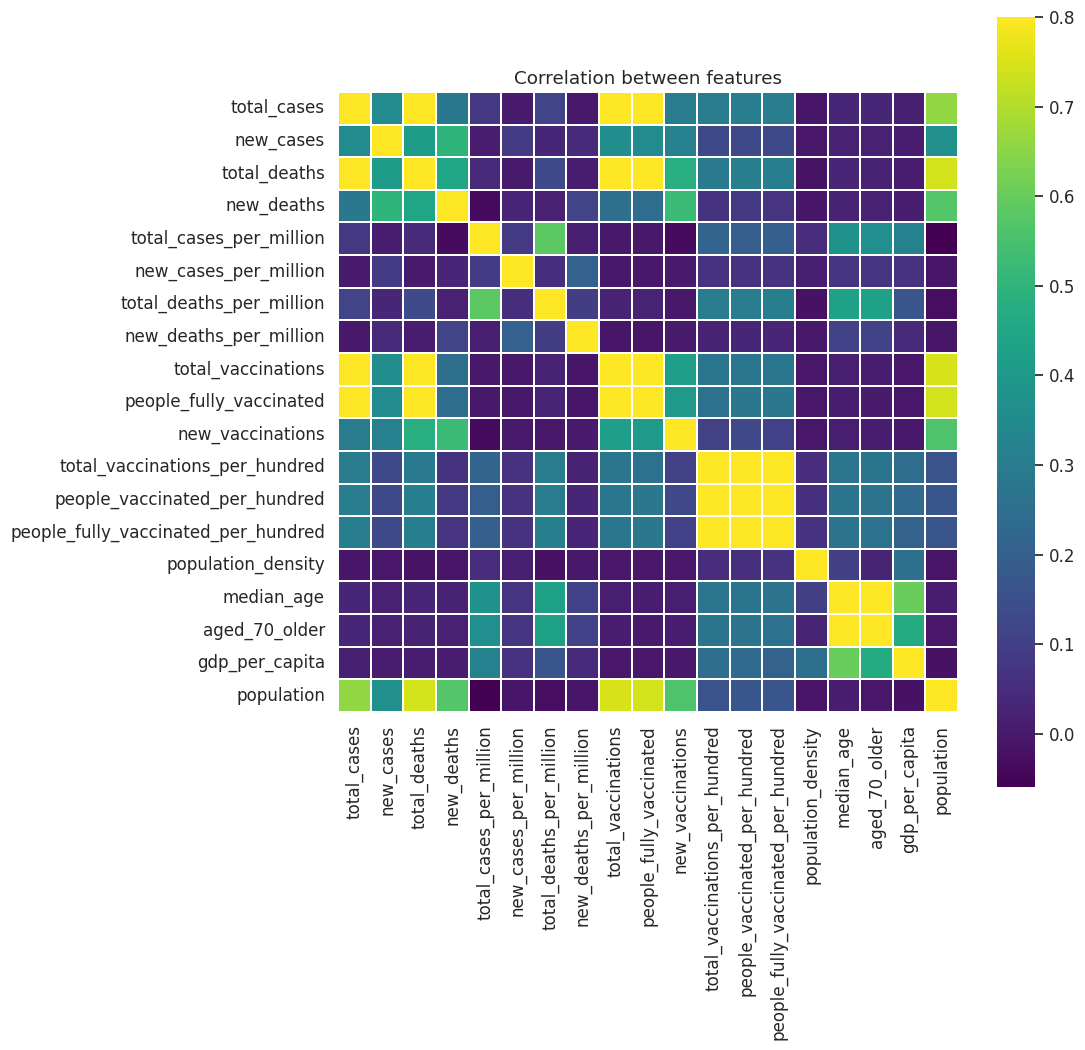

In [ ]:
correlation_matrix = filtered_df.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(correlation_matrix, vmax=.8, linewidths=0.01,
            square=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

### Total Cases

In [24]:
top_locations = df.groupby('location')['total_cases'].max()

# Sort the result in descending order and select the top 10
top_10_locations = top_locations.sort_values(ascending=False).head(10)

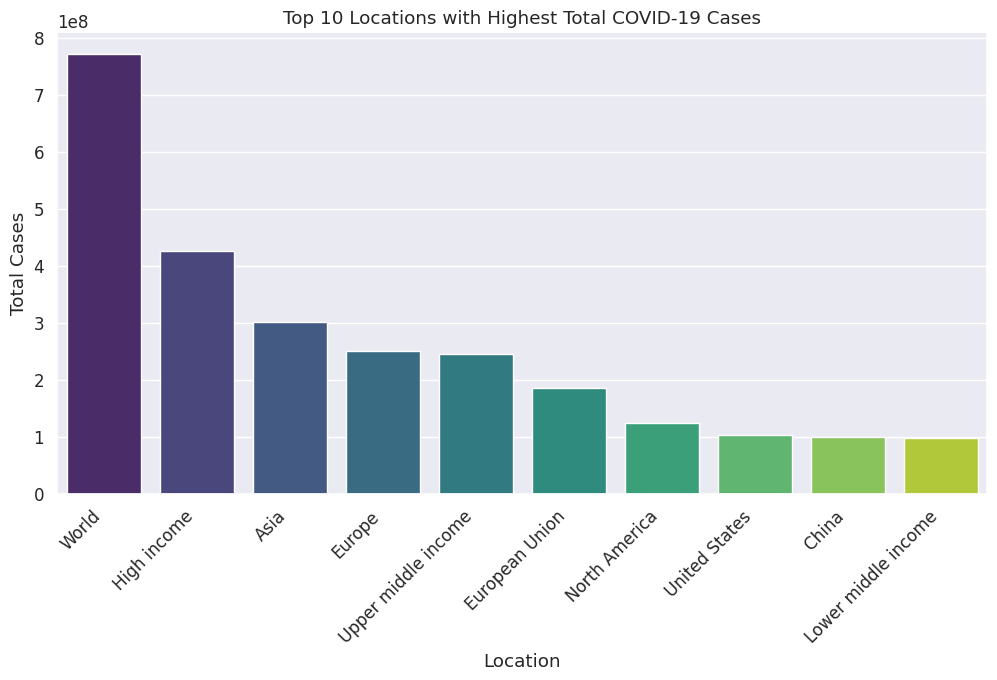

In [ ]:
# Convert to DataFrame for plotting
top_10_locations_df = top_10_locations.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_cases', data=top_10_locations_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Cases')
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

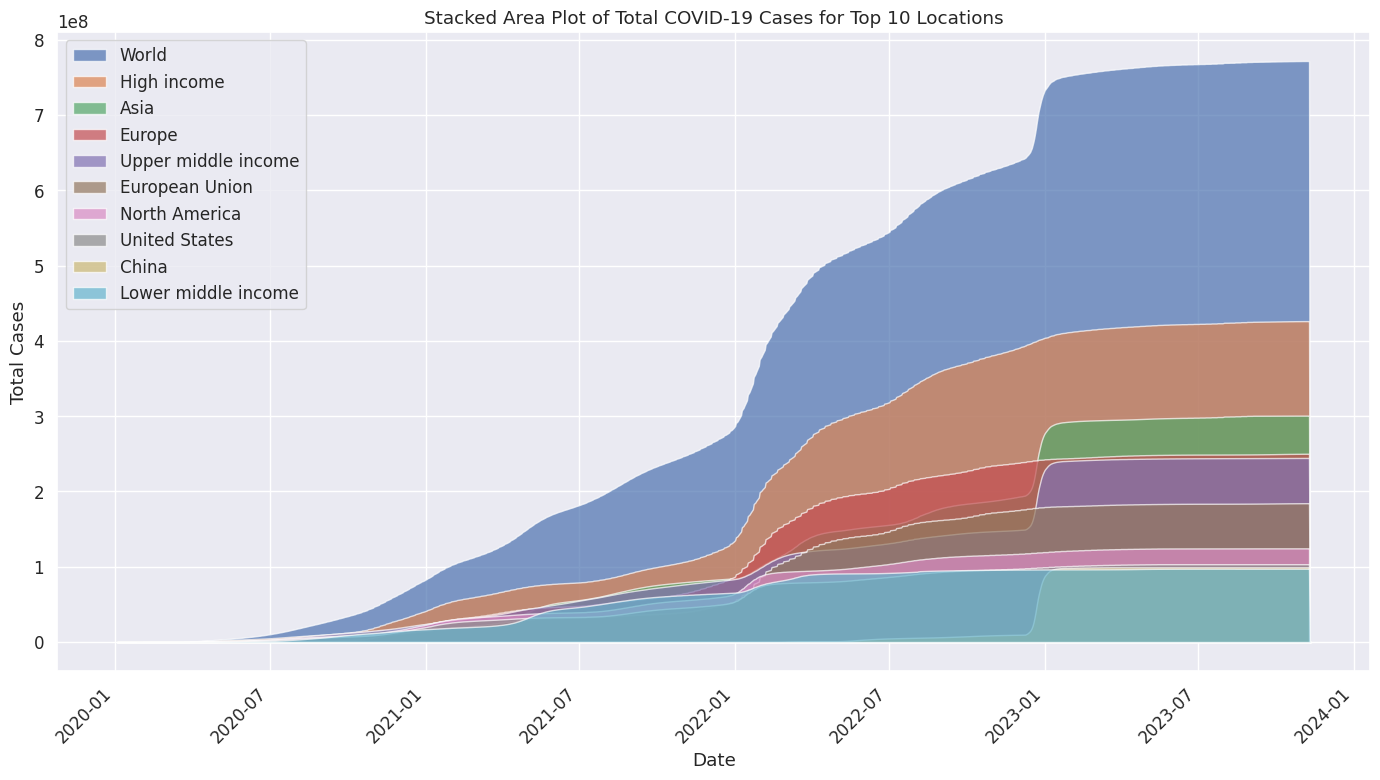

In [ ]:
top_10_data = df[df['location'].isin(top_10_locations.index)]

# Create a stacked area plot
plt.figure(figsize=(14, 8))

for location in top_10_locations.index:
    subset = top_10_data[top_10_data['location'] == location]
    plt.fill_between(subset['date'], subset['total_cases'], label=location, alpha=0.7)

# Set x-axis ticks to every 6 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Stacked Area Plot of Total COVID-19 Cases for Top 10 Locations')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

In [33]:
top_locations_continent = df.groupby('location')['total_cases_per_million'].max()

# Sort the result in descending order and select the top 10
top_10_locations_continent = top_locations_continent.sort_values(ascending=False).head(10)

In [34]:
top_10_locations_continent

location
Cyprus            737554.506
San Marino        736242.208
Brunei            696861.038
Austria           680262.588
South Korea       667207.062
Faeroe Islands    652484.139
Slovenia          635248.931
Gibraltar         628882.700
Martinique        626793.139
France            603427.621
Name: total_cases_per_million, dtype: float64

/tmp/ipykernel_6623/2259882973.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='location', y='total_cases_per_million', data=top_10_locations_continent_df, palette='viridis')


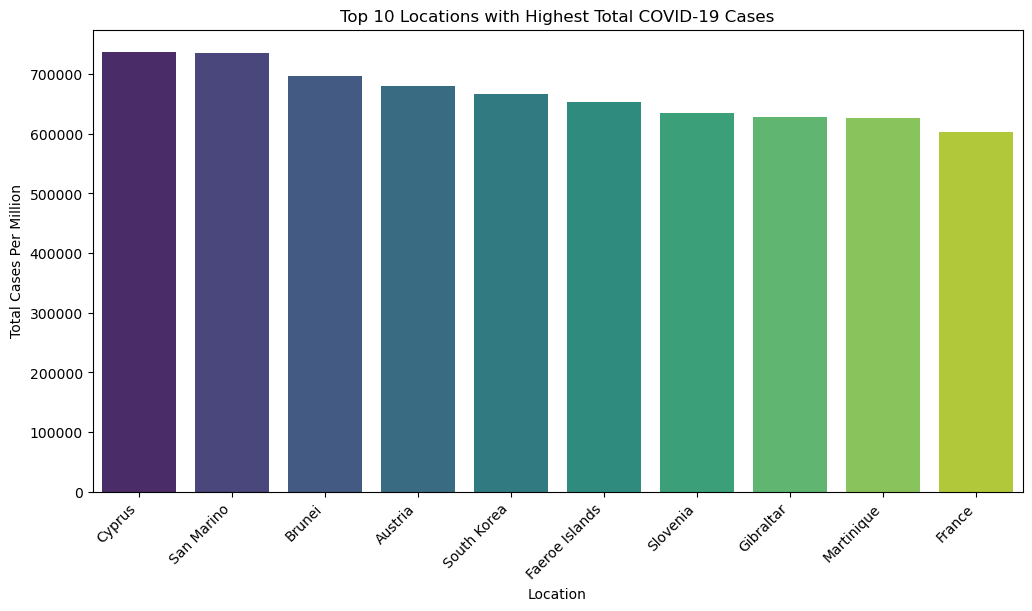

In [35]:
# Convert to DataFrame for plotting
top_10_locations_continent_df = top_10_locations_continent.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_cases_per_million', data=top_10_locations_continent_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Cases')
plt.xlabel('Location')
plt.ylabel('Total Cases Per Million')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [39]:
top_locations_continent = df.groupby('continent')['total_cases_per_million'].max()

# Sort the result in descending order and select the top 10
top_10_locations_continent = top_locations_continent.sort_values(ascending=False).head(10)

/tmp/ipykernel_6623/1919185850.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='total_cases_per_million', data=top_10_locations_continent_df, palette='viridis')


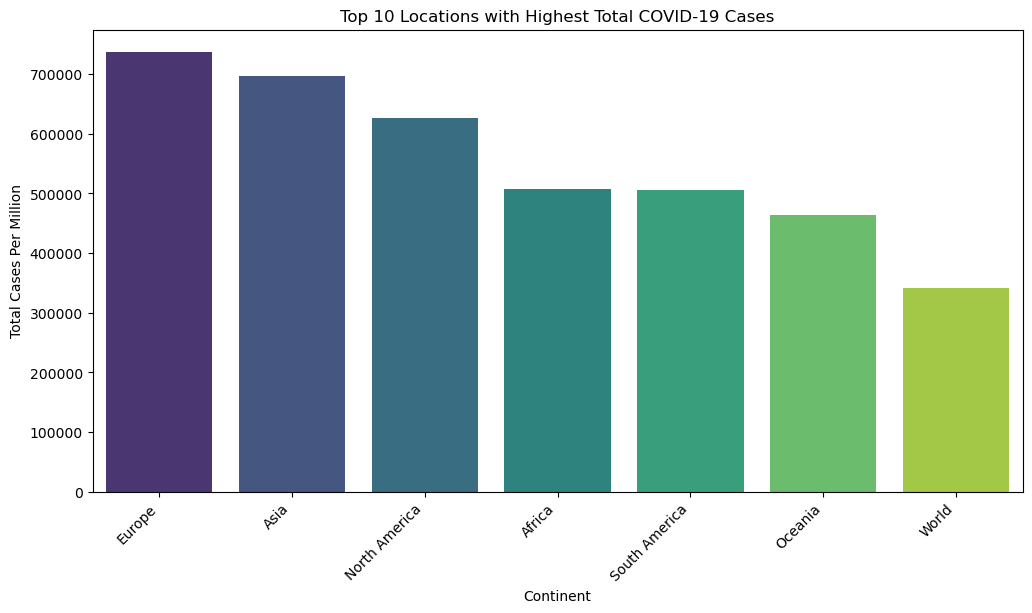

In [40]:
# Convert to DataFrame for plotting
top_10_locations_continent_df = top_10_locations_continent.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='total_cases_per_million', data=top_10_locations_continent_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Cases')
plt.xlabel('Continent')
plt.ylabel('Total Cases Per Million')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [20]:
top_locations_continent = df.groupby('continent')['total_deaths_per_million'].max()

# Sort the result in descending order and select the top 10
top_10_locations_continent = top_locations_continent.sort_values(ascending=False).head(10)

/tmp/ipykernel_5357/3268358852.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='total_deaths_per_million', data=top_10_locations_continent_df, palette='viridis')


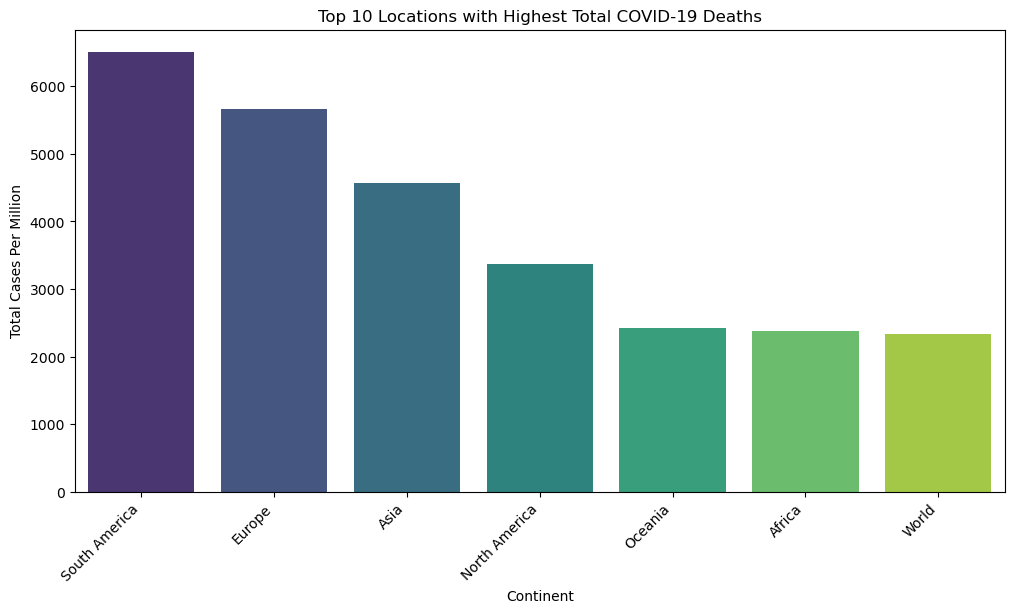

In [21]:
# Convert to DataFrame for plotting
top_10_locations_continent_df = top_10_locations_continent.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='total_deaths_per_million', data=top_10_locations_continent_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Deaths')
plt.xlabel('Continent')
plt.ylabel('Total Cases Per Million')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [22]:
top_locations_continent = df.groupby('continent')['life_expectancy'].max()

# Sort the result in descending order and select the top 10
top_10_locations_continent = top_locations_continent.sort_values(ascending=False).head(10)

/tmp/ipykernel_5357/1868425340.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='life_expectancy', data=top_10_locations_continent_df, palette='viridis')


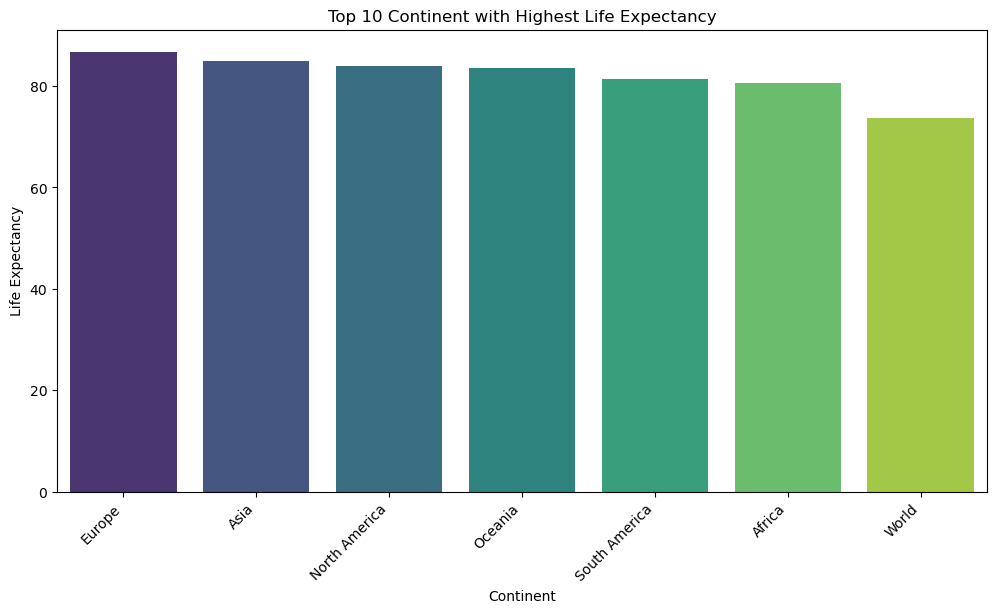

In [23]:
# Convert to DataFrame for plotting
top_10_locations_continent_df = top_10_locations_continent.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='life_expectancy', data=top_10_locations_continent_df, palette='viridis')
plt.title('Top 10 Continent with Highest Life Expectancy')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [24]:
top_locations_continent = df.groupby('continent')['diabetes_prevalence'].max()

# Sort the result in descending order and select the top 10
top_10_locations_continent = top_locations_continent.sort_values(ascending=False).head(10)

/tmp/ipykernel_5357/2514426861.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='continent', y='diabetes_prevalence', data=top_10_locations_continent_df, palette='viridis')


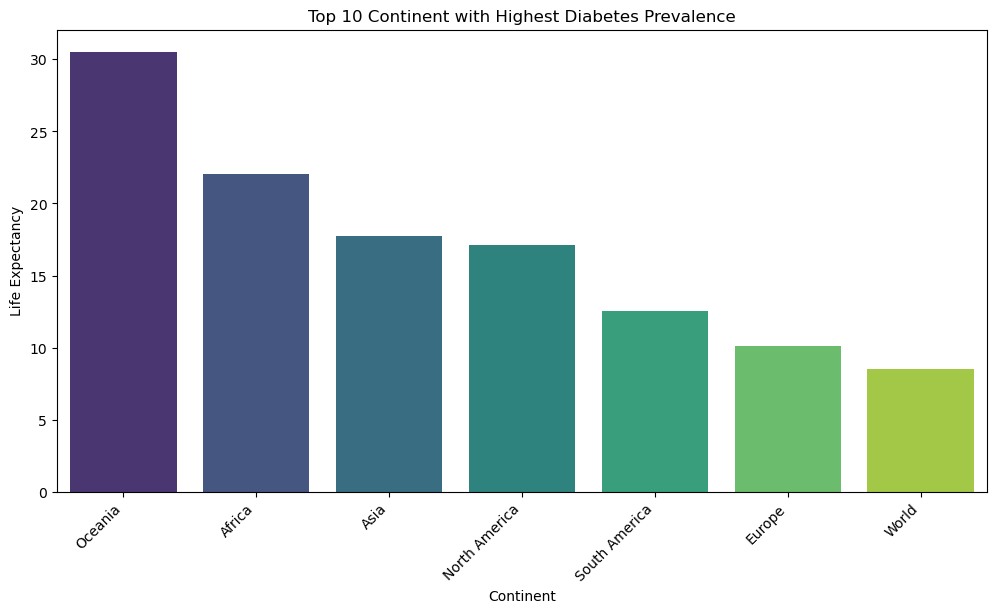

In [25]:
# Convert to DataFrame for plotting
top_10_locations_continent_df = top_10_locations_continent.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='diabetes_prevalence', data=top_10_locations_continent_df, palette='viridis')
plt.title('Top 10 Continent with Highest Diabetes Prevalence')
plt.xlabel('Continent')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

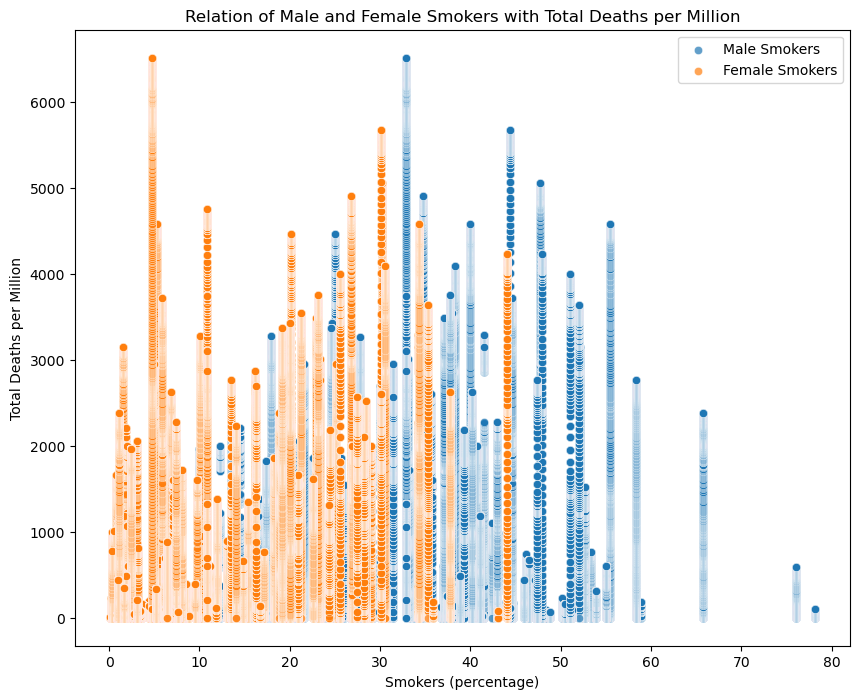

In [51]:
# Filter the DataFrame to include only necessary columns
smoking_death_data = df[['male_smokers', 'female_smokers', 'total_deaths_per_million']].dropna()

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='male_smokers', y='total_deaths_per_million', data=smoking_death_data, label='Male Smokers', alpha=0.7)
sns.scatterplot(x='female_smokers', y='total_deaths_per_million', data=smoking_death_data, label='Female Smokers', alpha=0.7)

# Customize the plot
plt.title('Relation of Male and Female Smokers with Total Deaths per Million')
plt.xlabel('Smokers (percentage)')
plt.ylabel('Total Deaths per Million')
plt.legend()
plt.show()

In [ ]:
# List of valid countries
valid_countries = ['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
                   'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
                   'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
                   'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                   'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
                   'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad',
                   'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
                   'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
                   'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini',
                   'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
                   'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau',
                   'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
                   'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
                   'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
                   'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Madagascar', 'Malawi', 'Malaysia',
                   'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius',
                   'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco',
                   'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia',
                   'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norway', 'Oman', 'Pakistan',
                   'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland',
                   'Portugal', 'Puerto Rico', 'Qatar', 'Reunion', 'Romania', 'Russia', 'Rwanda',
                   'Saint Barthelemy', 'Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia',
                   'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines',
                   'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia',
                   'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands',
                   'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan',
                   'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand',
                   'Timor', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
                   'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine',
                   'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan',
                   'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

# Filter the original DataFrame for valid countries
valid_countries_data = df[df['location'].isin(valid_countries)]

# Group by location and find the maximum total cases for each location
top_locations = valid_countries_data.groupby('location')['total_cases'].max()

# Sort the result in descending order and select the top 10
top_10_locations = top_locations.sort_values(ascending=False).head(10)

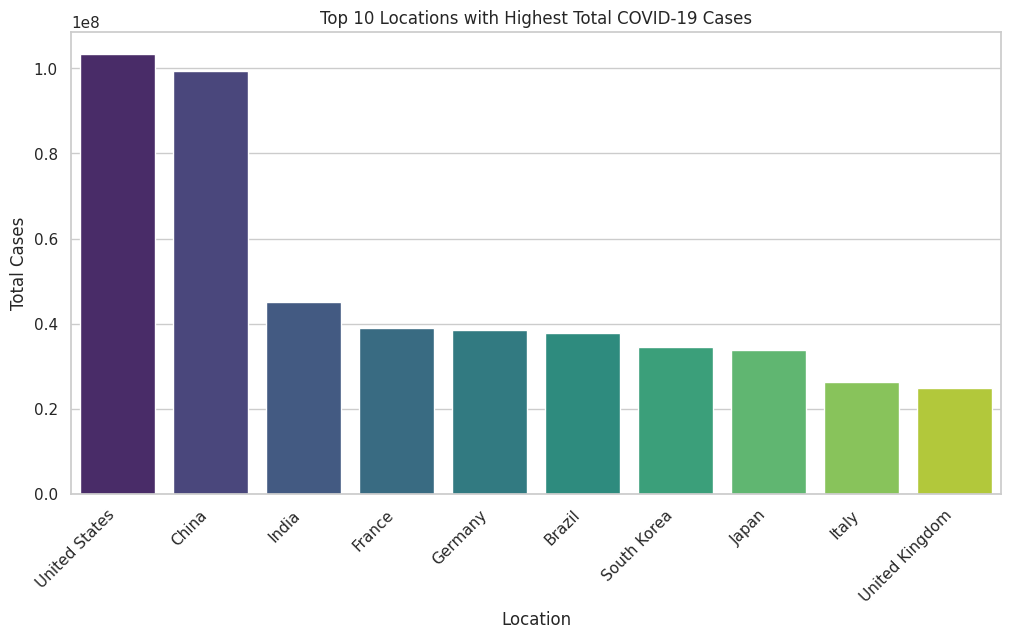

In [ ]:
# Convert to DataFrame for plotting
top_10_locations_df = top_10_locations.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_cases', data=top_10_locations_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Cases')
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

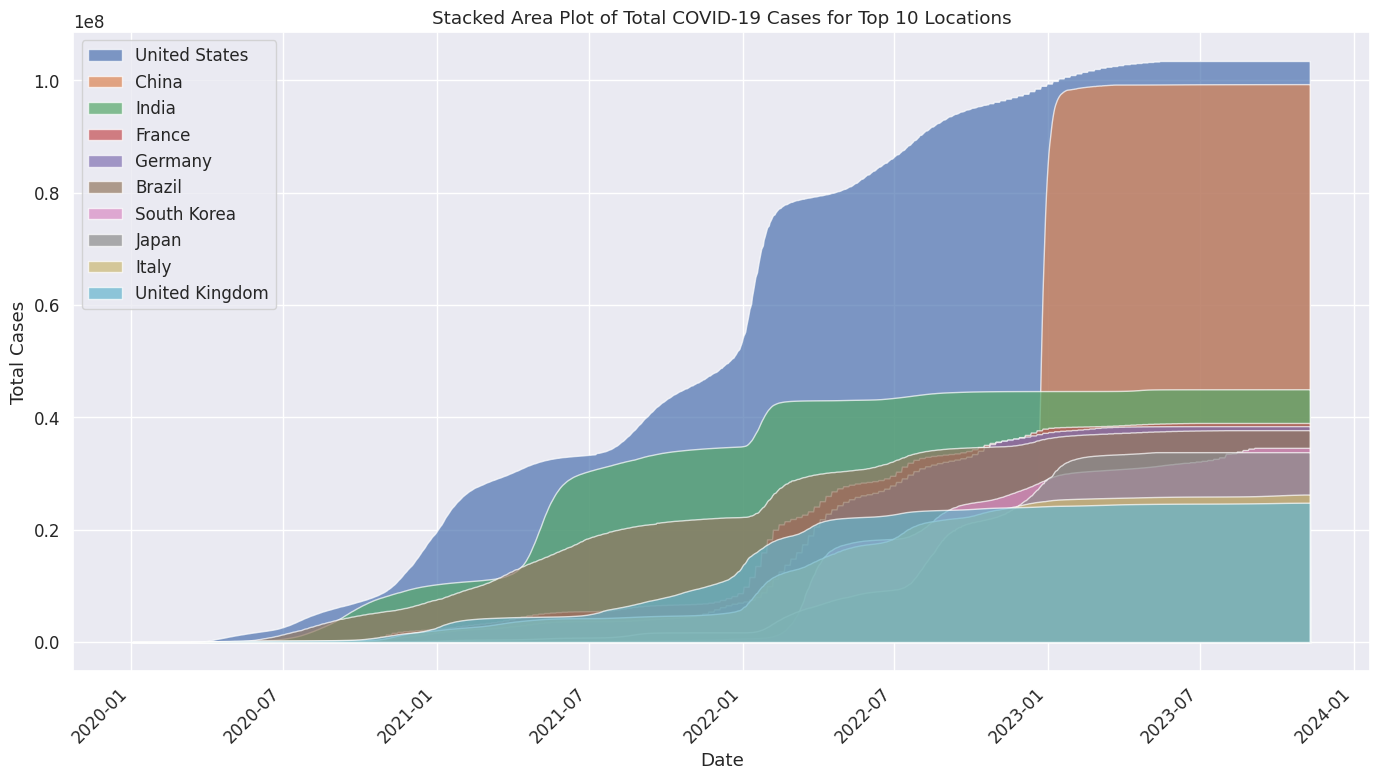

In [ ]:
top_10_data = df[df['location'].isin(top_10_locations.index)]

# Create a stacked area plot
plt.figure(figsize=(14, 8))

for location in top_10_locations.index:
    subset = top_10_data[top_10_data['location'] == location]
    plt.fill_between(subset['date'], subset['total_cases'], label=location, alpha=0.7)

# Set x-axis ticks to every 6 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Stacked Area Plot of Total COVID-19 Cases for Top 10 Locations')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

In [ ]:
# Filter the original DataFrame for valid countries
valid_countries_data = df[df['location'].isin(valid_countries)]

# Group by location and find the maximum total cases for each location
top_locations = valid_countries_data.groupby('location')['total_cases_per_million'].max()

# Sort the result in descending order and select the top 10
top_10_locations = top_locations.sort_values(ascending=False).head(10)

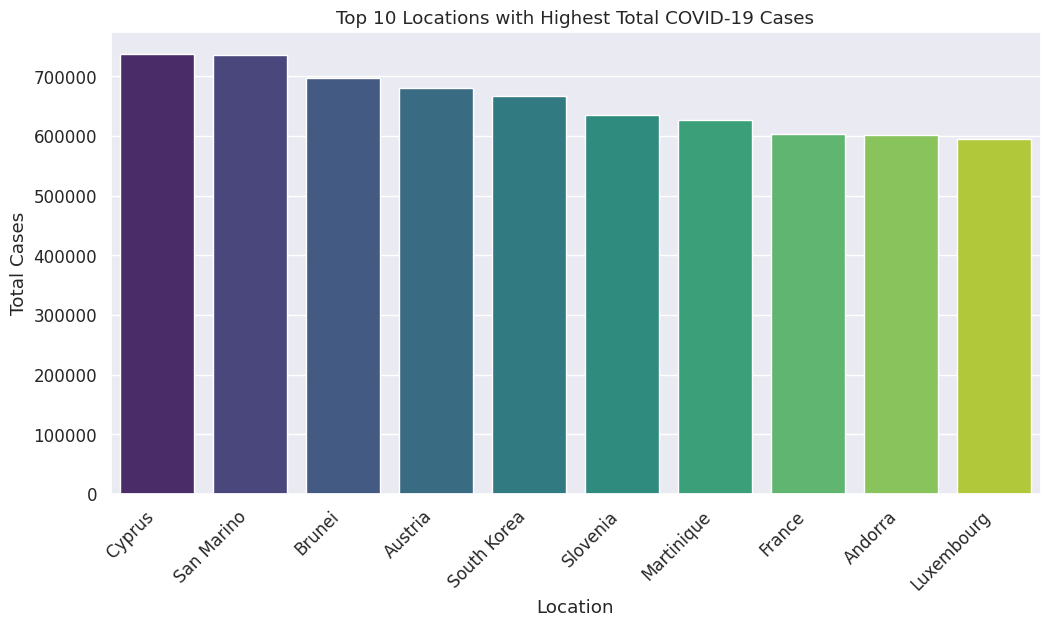

In [ ]:
# Convert to DataFrame for plotting
top_10_locations_df = top_10_locations.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_cases_per_million', data=top_10_locations_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Cases')
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### Total Death

In [ ]:
# Filter the original DataFrame for valid countries
valid_countries_data = df[df['location'].isin(valid_countries)]

# Group by location and find the maximum total cases for each location
top_locations = valid_countries_data.groupby('location')['total_deaths'].max()

# Sort the result in descending order and select the top 10
top_10_locations = top_locations.sort_values(ascending=False).head(10)

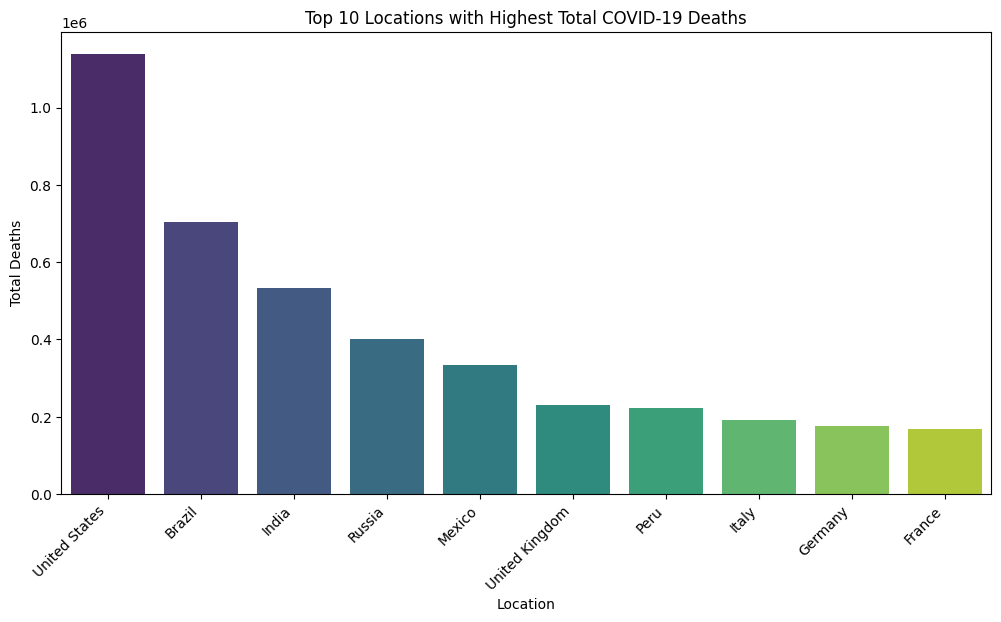

In [ ]:
# Convert to DataFrame for plotting
top_10_locations_df = top_10_locations.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_deaths', data=top_10_locations_df, palette='viridis')
plt.title('Top 10 Countries with Highest Total COVID-19 Deaths')
plt.xlabel('Location')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

<Figure size 1600x1000 with 0 Axes>

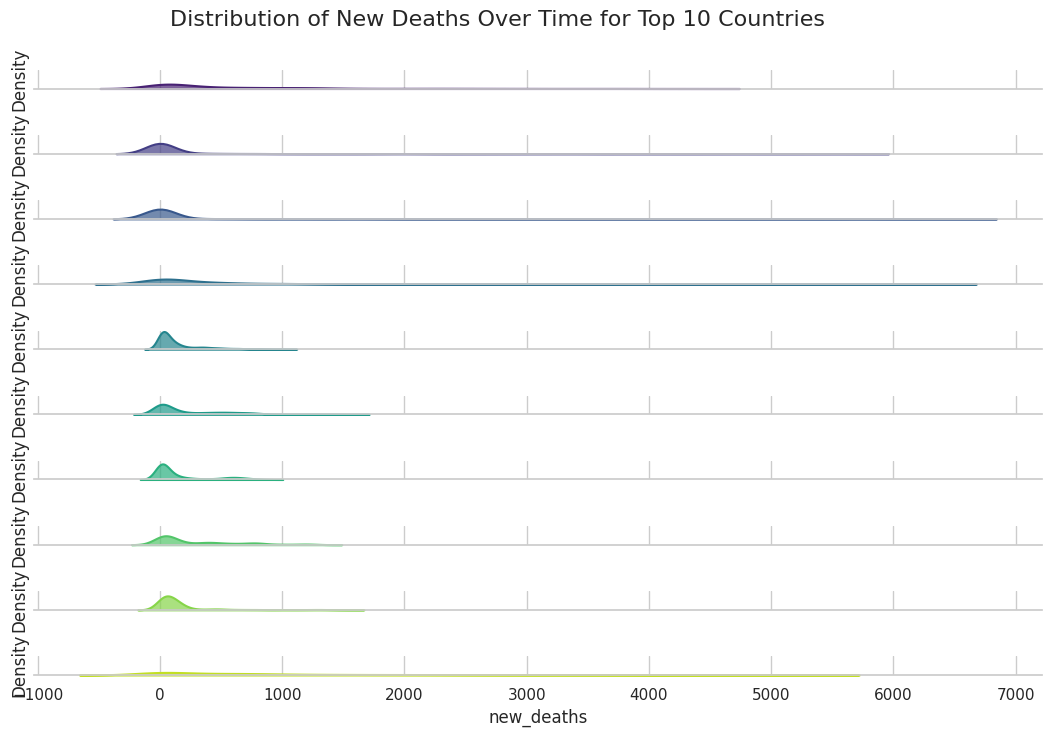

In [ ]:
top_10_data = valid_countries_data[valid_countries_data['location'].isin(top_10_locations.index)]

# Create a ridgeline plot for the distribution of new deaths over time for each country
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Use FacetGrid for ridgeline plot
g = sns.FacetGrid(top_10_data, row="location", hue="location", aspect=15, height=0.75, palette='viridis')

# Plot the ridgeline plot using the kdeplot function
g.map(sns.kdeplot, 'new_deaths', clip_on=False, fill=True, alpha=0.7, linewidth=1.5)

# Set titles and axis labels
g.set_titles("")
g.set(yticks=[])
g.despine(left=True)

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of New Deaths Over Time for Top 10 Countries', fontsize=16)

plt.show()

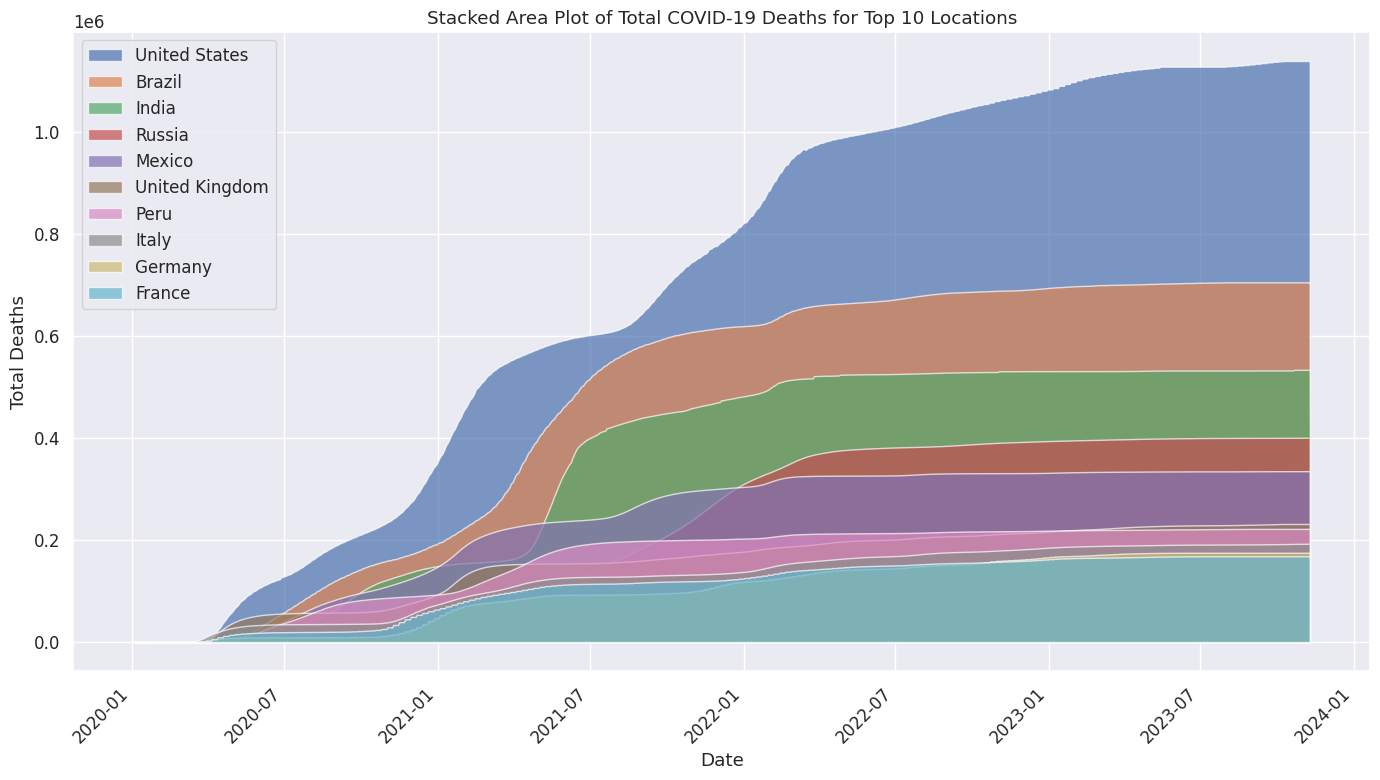

In [ ]:
top_10_data = df[df['location'].isin(top_10_locations.index)]

# Create a stacked area plot
plt.figure(figsize=(14, 8))

for location in top_10_locations.index:
    subset = top_10_data[top_10_data['location'] == location]
    plt.fill_between(subset['date'], subset['total_deaths'], label=location, alpha=0.7)

# Set x-axis ticks to every 6 months
plt.gca().xaxis.set_major_locator(MonthLocator(interval=6))
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m'))

plt.title('Stacked Area Plot of Total COVID-19 Deaths for Top 10 Locations')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend(loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of x-axis labels
plt.show()

In [ ]:
# Filter the original DataFrame for valid countries
valid_countries_data = df[df['location'].isin(valid_countries)]

# Group by location and find the maximum total cases for each location
top_locations = valid_countries_data.groupby('location')['total_deaths_per_million'].max()

# Sort the result in descending order and select the top 10
top_10_locations = top_locations.sort_values(ascending=False).head(10)

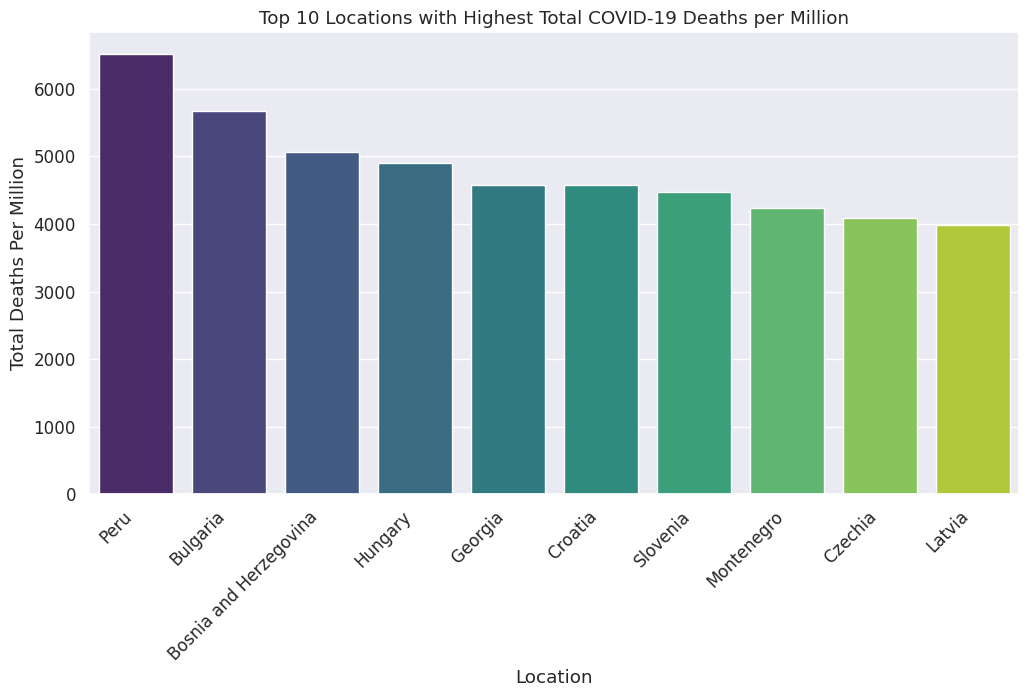

In [ ]:
# Convert to DataFrame for plotting
top_10_locations_df = top_10_locations.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='location', y='total_deaths_per_million', data=top_10_locations_df, palette='viridis')
plt.title('Top 10 Locations with Highest Total COVID-19 Deaths per Million')
plt.xlabel('Location')
plt.ylabel('Total Deaths Per Million')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

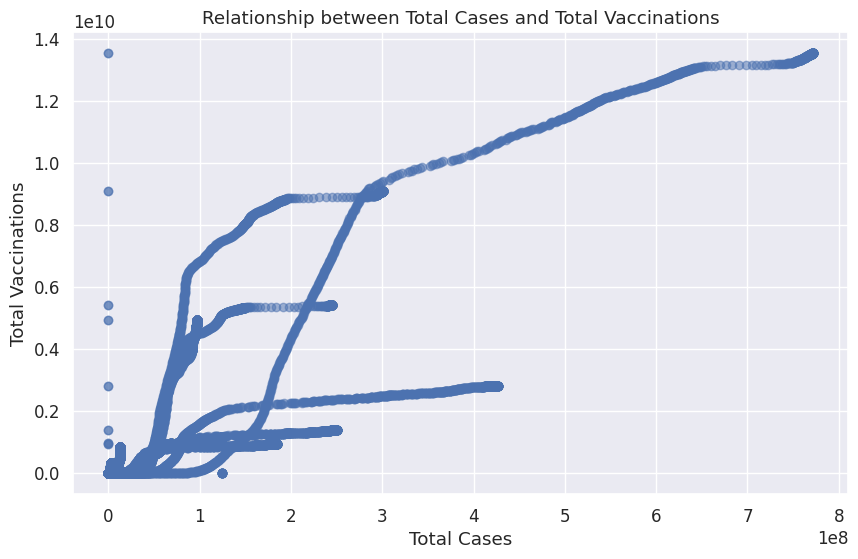

In [ ]:
total_cases = filtered_df['total_cases']
total_vaccinations = filtered_df['total_vaccinations']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(total_cases, total_vaccinations, alpha=0.5)
plt.title('Relationship between Total Cases and Total Vaccinations')
plt.xlabel('Total Cases')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.show()

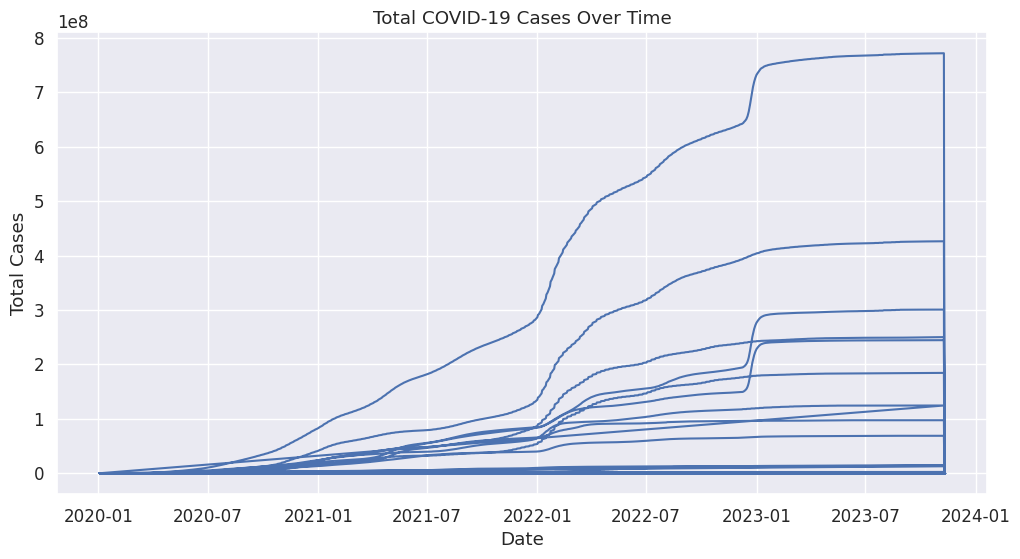

In [ ]:
# Data cleaning
df['date'] = pd.to_datetime(df['date'])
df_cleaned = df.dropna(subset=['total_cases'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['date'], df_cleaned['total_cases'])
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()


### Vaccinations

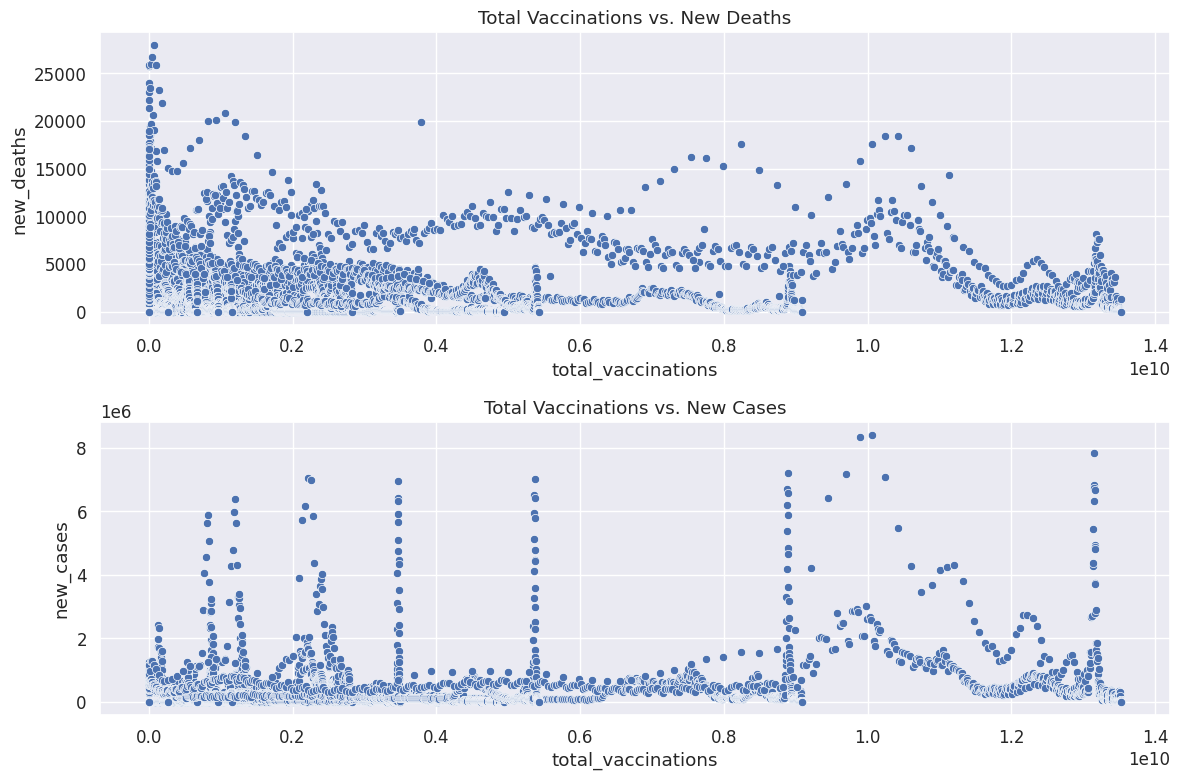

In [ ]:
# Filter the dataset to include only necessary columns
vaccination_death_cases_data = df[['date', 'total_vaccinations', 'new_deaths', 'new_cases']].copy()

# Drop rows with missing values
vaccination_death_cases_data.dropna(inplace=True)

# Create a scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for total vaccinations vs. new deaths
plt.subplot(2, 1, 1)
sns.scatterplot(x='total_vaccinations', y='new_deaths', data=vaccination_death_cases_data)
plt.title('Total Vaccinations vs. New Deaths')

# Scatter plot for total vaccinations vs. new cases
plt.subplot(2, 1, 2)
sns.scatterplot(x='total_vaccinations', y='new_cases', data=vaccination_death_cases_data)
plt.title('Total Vaccinations vs. New Cases')

plt.tight_layout()
plt.show()

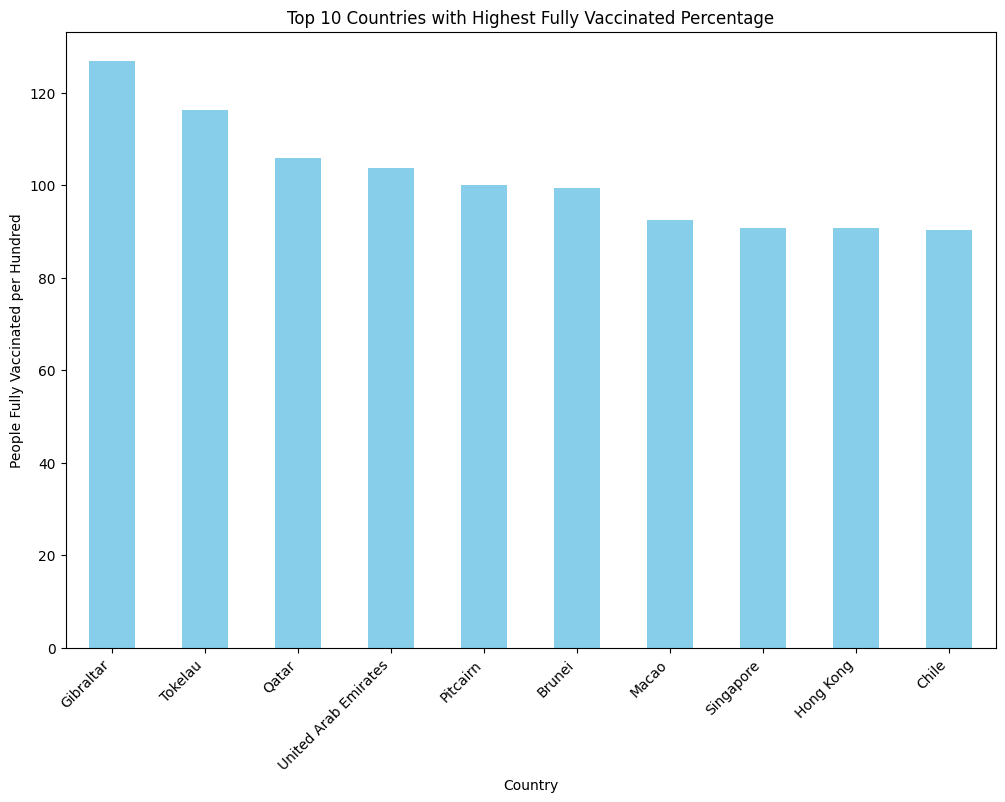

In [ ]:
vaccination_data = df[['location', 'people_fully_vaccinated_per_hundred']].copy()

# Drop rows with missing values
vaccination_data.dropna(inplace=True)

# Group by location and find the maximum fully vaccinated percentage for each country
top_countries_fully_vaccinated = vaccination_data.groupby('location')['people_fully_vaccinated_per_hundred'].max()

# Sort the result in descending order and select the top 10
top_10_countries_fully_vaccinated = top_countries_fully_vaccinated.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 8))
top_10_countries_fully_vaccinated.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Fully Vaccinated Percentage')
plt.xlabel('Country')
plt.ylabel('People Fully Vaccinated per Hundred')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
vaccination_start_dates = df[['location', 'date', 'people_fully_vaccinated_per_hundred']].copy()

# Drop rows with missing values
vaccination_start_dates.dropna(inplace=True)

# Find the first date of vaccination for each country
first_vaccination_dates = vaccination_start_dates.groupby('location')['date'].min()

# Sort the result to get the 10 countries that started earliest
earliest_10_countries = first_vaccination_dates.sort_values().head(10)

print(earliest_10_countries)

location
Argentina                  2020-01-01
Mexico                     2020-01-01
Afghanistan                2020-01-03
Niger                      2020-01-03
Nigeria                    2020-01-03
Niue                       2020-01-03
North America              2020-01-03
North Korea                2020-01-03
North Macedonia            2020-01-03
Northern Mariana Islands   2020-01-03
Name: date, dtype: datetime64[ns]


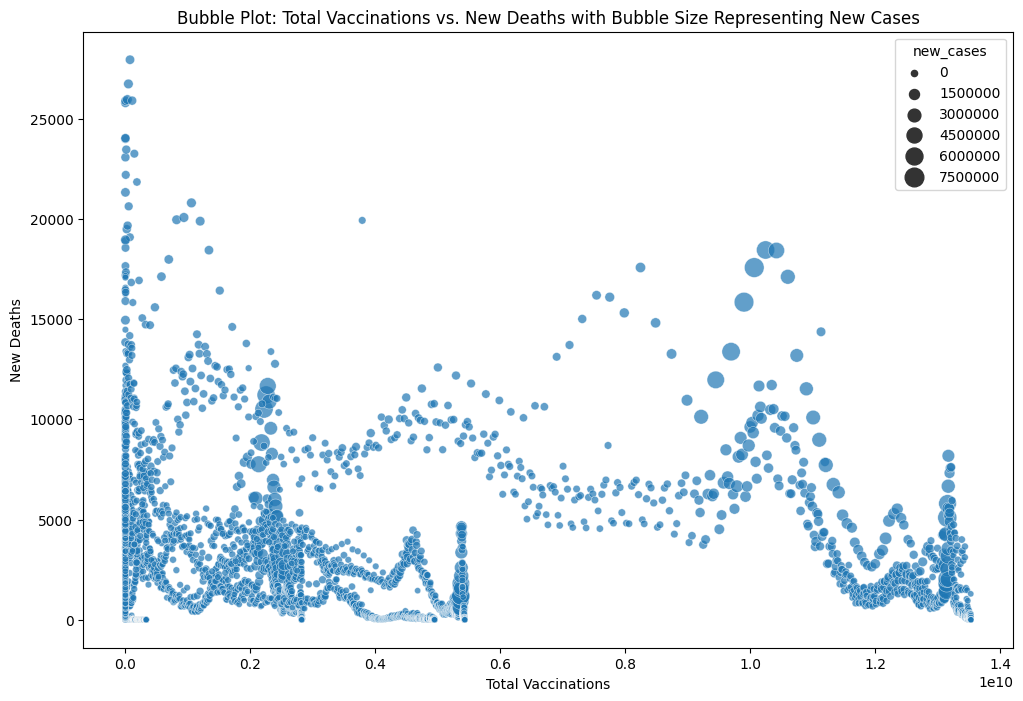

In [ ]:
world_data = df[df['continent'] == 'World']


vaccination_death_cases_data = world_data[['date', 'total_vaccinations', 'new_deaths', 'new_cases']].copy()

# Drop rows with missing values
vaccination_death_cases_data.dropna(inplace=True)

# Create a bubble plot
plt.figure(figsize=(12, 8))

# Scatter plot for total vaccinations vs. new deaths with bubble size representing new cases
sns.scatterplot(x='total_vaccinations', y='new_deaths', size='new_cases', data=vaccination_death_cases_data, sizes=(20, 200), alpha=0.7)

plt.title('Bubble Plot: Total Vaccinations vs. New Deaths with Bubble Size Representing New Cases')
plt.xlabel('Total Vaccinations')
plt.ylabel('New Deaths')

plt.show()

### Map


/tmp/ipykernel_5357/4105852972.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


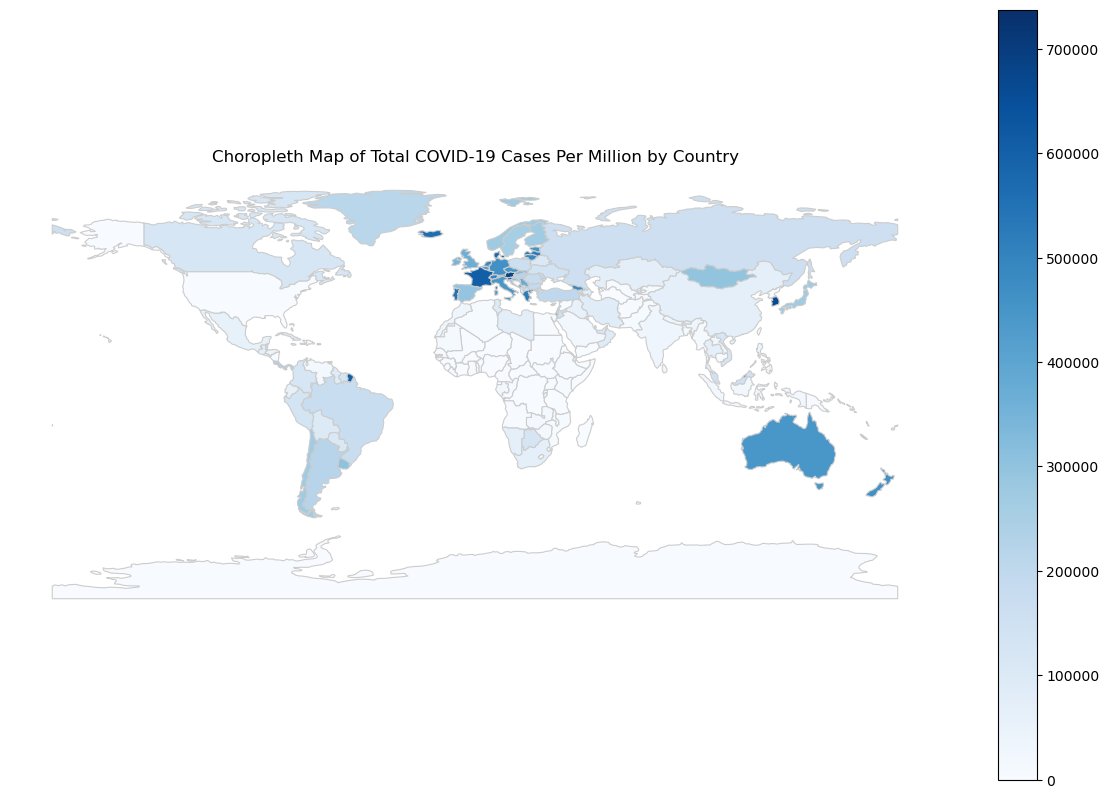

In [28]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group by location to get total cases for each country
total_cases_by_country = df.groupby('location')['total_cases_per_million'].max().reset_index()

# Merge the world map with the total cases data
merged_data = world.merge(total_cases_by_country, left_on='name', right_on='location', how='left')

# Fill NaN values with 0 for countries with no total cases data
merged_data['total_cases_per_million'] = merged_data['total_cases_per_million'].fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='total_cases_per_million', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Choropleth Map of Total COVID-19 Cases Per Million by Country')
ax.set_axis_off()
plt.show()

/tmp/ipykernel_5357/2706751917.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


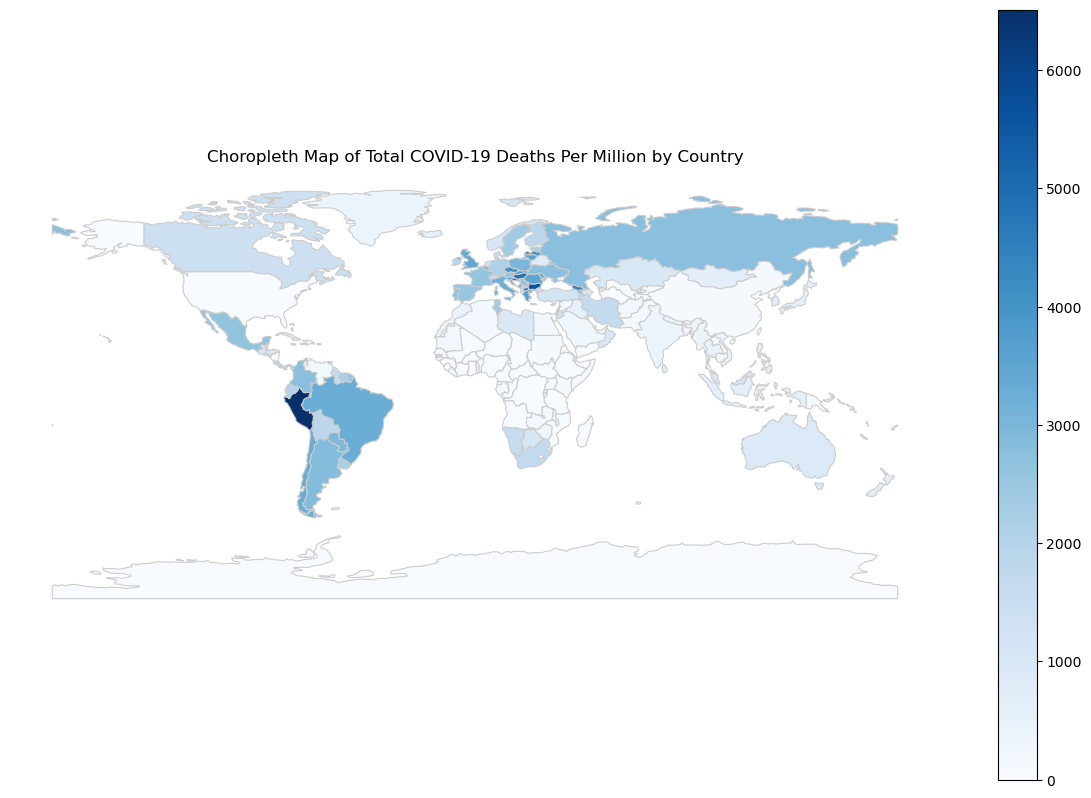

In [29]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group by location to get total cases for each country
total_cases_by_country = df.groupby('location')['total_deaths_per_million'].max().reset_index()

# Merge the world map with the total cases data
merged_data = world.merge(total_cases_by_country, left_on='name', right_on='location', how='left')

# Fill NaN values with 0 for countries with no total cases data
merged_data['total_deaths_per_million'] = merged_data['total_deaths_per_million'].fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='total_deaths_per_million', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Choropleth Map of Total COVID-19 Deaths Per Million by Country')
ax.set_axis_off()
plt.show()

<ipython-input-47-8a2eda285d61>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


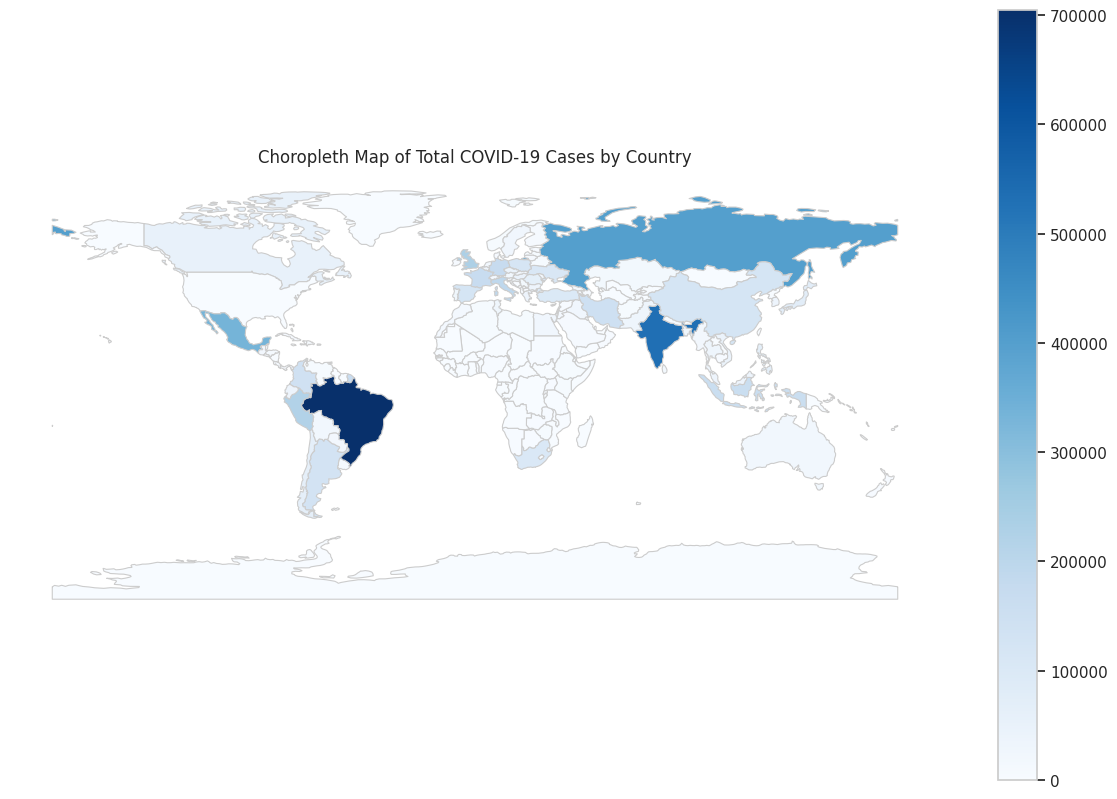

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group by location to get total cases for each country
total_cases_by_country = df.groupby('location')['total_deaths'].max().reset_index()

# Merge the world map with the total cases data
merged_data = world.merge(total_cases_by_country, left_on='name', right_on='location', how='left')

# Fill NaN values with 0 for countries with no total cases data
merged_data['total_deaths'] = merged_data['total_deaths'].fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='total_deaths', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Choropleth Map of Total COVID-19 Cases by Country')
ax.set_axis_off()
plt.show()

/tmp/ipykernel_5357/3882457309.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


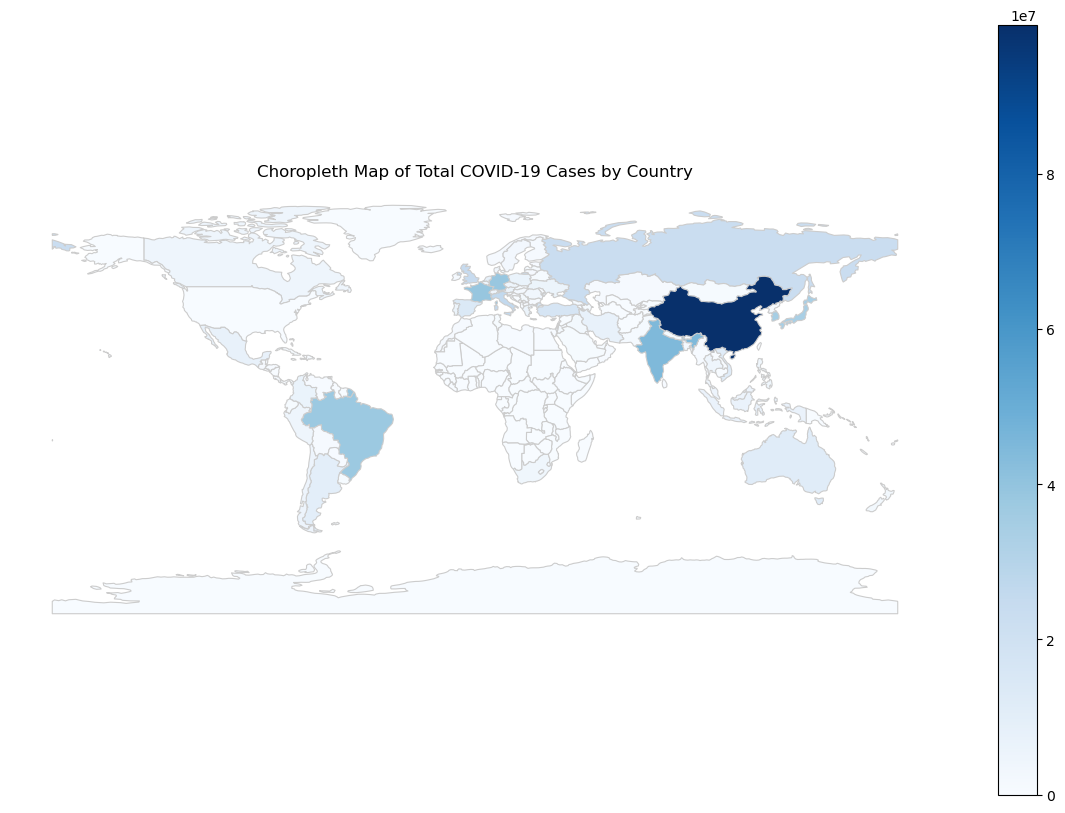

In [27]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Group by location to get total cases for each country
total_cases_by_country = df.groupby('location')['total_cases'].max().reset_index()

# Merge the world map with the total cases data
merged_data = world.merge(total_cases_by_country, left_on='name', right_on='location', how='left')

# Fill NaN values with 0 for countries with no total cases data
merged_data['total_cases'] = merged_data['total_cases'].fillna(0)

# Plot the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='total_cases', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Customize the plot
ax.set_title('Choropleth Map of Total COVID-19 Cases by Country')
ax.set_axis_off()
plt.show()